#  02. Neural Network with PyTorch

Classification is a problem of predicting whether something belongs to one class or other.



## 1. Make classification data

In [1]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
len(X), len(y)

(1000, 1000)

In [3]:
print(f'1st 5 values of X: {X[:5]}')
print(f'1st 5 values of y: {y[:5]}')

1st 5 values of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
1st 5 values of y: [1 1 1 1 0]


In [4]:
# Make Dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                      "X2": X[:,1],
                     "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


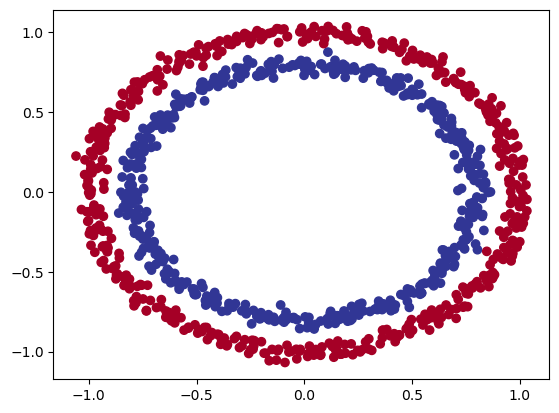

In [5]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
           y=X[:, 1],
           c=y,
           cmap=plt.cm.RdYlBu);

### 1.1 Check input and output shape

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [8]:
# View 1st example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Sample of X: {X_sample} and sample of y: {y_sample}")
print(f"Shape of X: {X_sample.shape} and shape of y: {y_sample.shape}")

Sample of X: [0.75424625 0.23148074] and sample of y: 1
Shape of X: (2,) and shape of y: ()


### 1.2 Turn Data to Tensors and create train and test spits

In [9]:
import torch
torch.__version__

'2.0.0'

In [10]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [11]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [12]:
# Spliting data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y,
                                                  test_size=0.2,
                                                  random_state=42)

In [13]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Bulding a model to clssify blue and red dots.

to do so, we want to:
1. Setup device agnostic code so our code will run on accelerator if there is one
2. Construct a model (by subclass `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and testing

In [14]:
# Import PyTorch and nn
import torch
import torch.nn as nn

# Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Now we create a model:

1. Subclasses `nn.Module`
2. Create 2 `nn.Linear()`
3. Define a `forward()` defines forwar computation of model
4. Instantiate a instance of model and send it to target `device`

In [15]:
# 1. Construct a subclass nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,
                                out_features=5)
        self.layer_2 = nn.Linear(in_features=5,
                                out_features=1)
        '''self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1))'''
        
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.layer_2(self.layer_1(X))
    
model_0 = CircleModelV0().to(device)

In [16]:
model_0.parameters

<bound method Module.parameters of CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)>

In [17]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [18]:
# replicate model using nn.Sequential
model_0 = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5479, -0.1545],
                      [-0.5375,  0.1383],
                      [ 0.2980,  0.3974],
                      [ 0.3948,  0.4714],
                      [ 0.4256, -0.5627]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.3091, -0.2328, -0.4089,  0.1722,  0.1713], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.2348,  0.3971, -0.0569, -0.1291,  0.0672]], device='cuda:0')),
             ('1.bias', tensor([0.3122], device='cuda:0'))])

In [20]:
# Make predctions
'''model_0.eval()
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
binary_preds = (untrained_preds > 0.5).float() '''
    
'''print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")'''

'print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")\nprint(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")'

In [21]:
'''plt.scatter(x=X_test[:, 0],
            y=X_test[:, 1],
            c=binary_preds.to("cpu"),
            cmap=plt.cm.RdYlBu);'''

'plt.scatter(x=X_test[:, 0],\n            y=X_test[:, 1],\n            c=binary_preds.to("cpu"),\n            cmap=plt.cm.RdYlBu);'

### 2.1 Setup loss function and optimizer

Choosing loss fn and optimizer

For Regression: MAE or MSE (Mean Absolute Error or Mean Squared Error)

For classification: Binary Cross entropy or Categorical Cross Entropy.

For Optimizer: We may use SGD and Adam

For calculating loss we are using `torch.nn.BCEwithLogitsLoss()`

ref - 
* https://www.learnpytorch.io/02_pytorch_classification/
* https://pytorch.org/docs/stable/nn.html#loss-functions
* https://pytorch.org/docs/stable/optim.html

In [22]:
# Setup loss function
#loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior toimput to BCELoss
'''nn.Sequential(
    nn.Sigmoid(),
    nn.BCELoss()
)'''
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid ativation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                        lr=0.1)

In [23]:
# Calculate Accuracy - out of 100 correct prediction was made in percent
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## 3. Train Model

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backward propogation)
5. Optimizer step (gradient descent)

### 3.1 Goining from raw logits -> prediction probabiites -> predictin labels

Our Model outputs are going to raw **logits**

we can convert **logits** into prediction probailities by pasing them to some kind of activation funcation (e.g. sigmoid for binary corssentropy and softmax for multiclass classification).

then we can covert Prediction probabilities to **prediction labels** by either rounding them or takng the `argmax()`.

In [24]:
# Veiw the first 5 outputs of forwardpass on test deta

model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.3778],
        [0.2004],
        [0.6052],
        [0.3144],
        [0.2278]], device='cuda:0')

In [25]:
# Use sigmoid activation functions on our model logits to turn them into predictions probabilites
y_pred_proba = torch.sigmoid(y_logits)
y_pred_proba

tensor([[0.5934],
        [0.5499],
        [0.6468],
        [0.5780],
        [0.5567]], device='cuda:0')

For our predicitons probabilites values, we need to perform a range-style rounding on them:
    
* `y_pred_proba` >= 0.5, `y=1` (class 1)
* `y_pred_proba` < 0.5, `y=0` (class 0)

In [26]:
# find the predicted labels
Y_preds = torch.round(y_pred_proba)
Y_preds

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

In [27]:
# Checikng for equality 
print(torch.eq(Y_preds.squeeze(),y_test[:5].squeeze().to(device)))

tensor([ True, False,  True, False,  True], device='cuda:0')


### 3.2 Building a training and testing loop

In [28]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set no. of epochs
EPOCHS = 100

# Put dta to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(EPOCHS):
    
    #Training
    model_0.train()
    
    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred proba _ pred labels
    
    # 2. Calculate the loss 
    #loss = loss_fn(torch.sigmoid(y_logits)) #nn.BCELoss expects predction probablities
    
    loss = loss_fn(y_logits, #nn.BCEWithLogits expects raw logits as input
                   y_train) 
    
    acc = accuracy_fn(y_true=y_train,
                     y_pred=y_pred)
    
    # 3. Optimizer xero grad
    optimizer.zero_grad()
    
    # 4. loss backward
    loss.backward()
    
    # 5. Optimizer step (gradient descent)
    optimizer.step()
    
    ### testing
    model_0.eval()
    with torch.inference_mode():
        
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits,
                           y_test)
        test_acc = accuracy_fn(y_true=y_test,
                              y_pred=test_pred)
    
    # Print out Results
    if  epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}%, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
    

Epoch: 0 | Loss: 0.71406%, Acc: 57.12% | Test loss: 0.70481, Test acc: 60.00%
Epoch: 10 | Loss: 0.70519%, Acc: 52.62% | Test loss: 0.69830, Test acc: 56.50%
Epoch: 20 | Loss: 0.70070%, Acc: 51.50% | Test loss: 0.69534, Test acc: 52.00%
Epoch: 30 | Loss: 0.69825%, Acc: 51.88% | Test loss: 0.69398, Test acc: 50.00%
Epoch: 40 | Loss: 0.69679%, Acc: 51.62% | Test loss: 0.69334, Test acc: 49.50%
Epoch: 50 | Loss: 0.69585%, Acc: 50.62% | Test loss: 0.69305, Test acc: 51.00%
Epoch: 60 | Loss: 0.69520%, Acc: 50.38% | Test loss: 0.69293, Test acc: 51.00%
Epoch: 70 | Loss: 0.69473%, Acc: 50.50% | Test loss: 0.69290, Test acc: 50.00%
Epoch: 80 | Loss: 0.69437%, Acc: 50.25% | Test loss: 0.69293, Test acc: 50.50%
Epoch: 90 | Loss: 0.69409%, Acc: 50.38% | Test loss: 0.69299, Test acc: 50.50%


## 4. Make Predictions adn evaluate the model

From metrics it looks like our model isnt learning anything

So to inspect it lets make predictions and visualize them

to do so, we're going to import a function called `plot_descision_boundary()`

ref - 
* https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [29]:
import requests
from pathlib import Path

# Download helper functons from Learn PyTorch repo if doesnt present
if Path('helper_functions.py').is_file():
    print("File is present, skip download")
else:
    print('Downloading file')
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)
        
from helper_functions import plot_predictions, plot_decision_boundary

  ### 

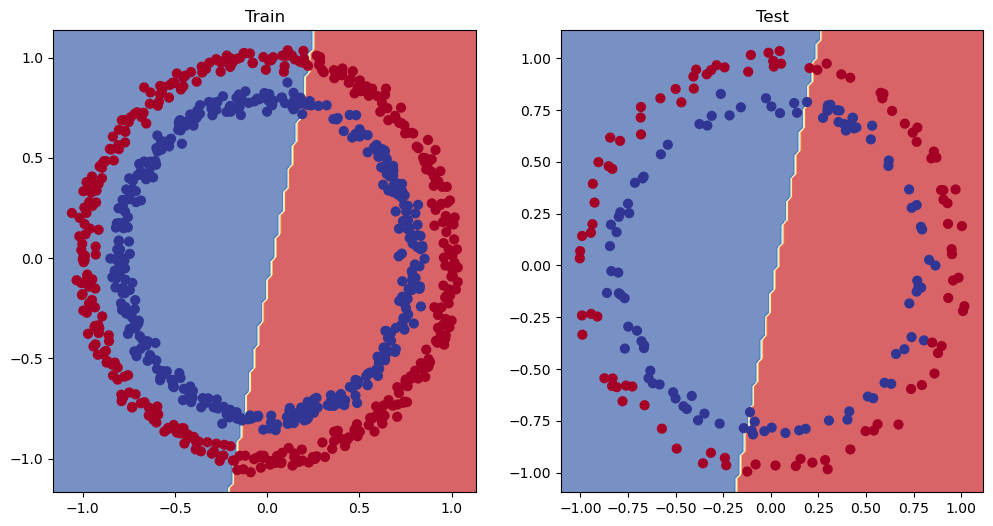

In [30]:
# Plot descision boundary of model
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from model perspective)

* Add more layers - give  the model more chances to learn about patters in data
* Add more hidden layers - go from 5 hidden units to 10 hidden units
* Fit for longer 
* Changing the ctivation functions
* Changing the Learning rate
* Change the loss function

These options are all from model's perspective beacause they deal directly with the model, rather than the data. 

And beacause these options are all values we can change, they'er called **hyperparameters**.

Trying to improve our model by:
* Adding more hidder units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 - 1000



In [31]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x):
        #z = self.layer_1(x)
        #z = self.layer_2(z)
        #z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operatins leverages the speed ups where possible behind secnes
    
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [32]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [33]:
# Create a loss function

loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)


In [34]:
# Training Loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
EPOCHS = 1000

# Put data on target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# Training Loop
for epoch in range(EPOCHS):
    
    ### Training
    model_1.train()
    
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> predict labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
    # 2. calculate loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_pred)
    
    # Print status
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.3f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.3f}")

Epoch: 0 | Loss: 0.69396, Acc: 50.875 | Test loss: 0.69261, Test acc: 51.000
Epoch: 100 | Loss: 0.69305, Acc: 50.375 | Test loss: 0.69379, Test acc: 48.000
Epoch: 200 | Loss: 0.69299, Acc: 51.125 | Test loss: 0.69437, Test acc: 46.000
Epoch: 300 | Loss: 0.69298, Acc: 51.625 | Test loss: 0.69458, Test acc: 45.000
Epoch: 400 | Loss: 0.69298, Acc: 51.125 | Test loss: 0.69465, Test acc: 46.000
Epoch: 500 | Loss: 0.69298, Acc: 51.000 | Test loss: 0.69467, Test acc: 46.000
Epoch: 600 | Loss: 0.69298, Acc: 51.000 | Test loss: 0.69468, Test acc: 46.000
Epoch: 700 | Loss: 0.69298, Acc: 51.000 | Test loss: 0.69468, Test acc: 46.000
Epoch: 800 | Loss: 0.69298, Acc: 51.000 | Test loss: 0.69468, Test acc: 46.000
Epoch: 900 | Loss: 0.69298, Acc: 51.000 | Test loss: 0.69468, Test acc: 46.000


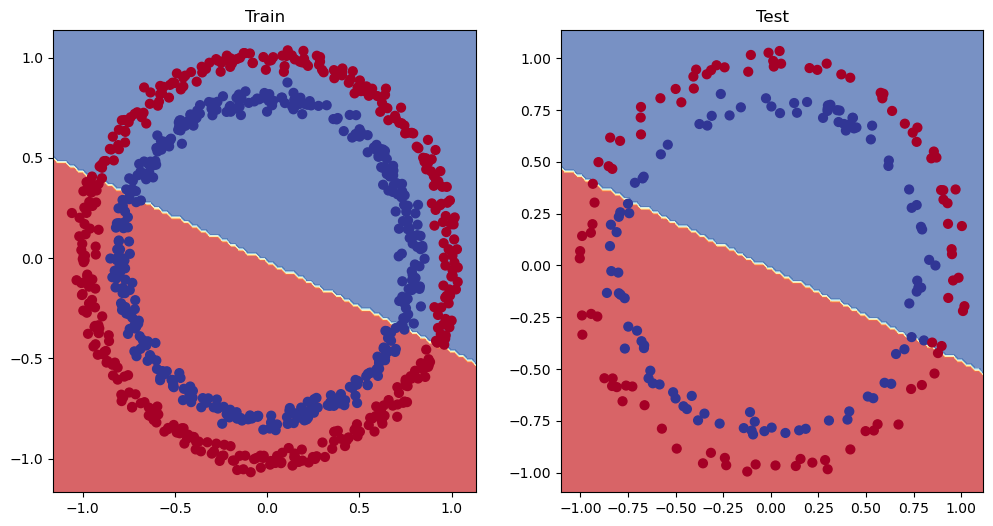

In [35]:
# Plot the descision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Prepare data to see if our model can fit a straight line

one way to test out larger problem is to slove smaller problem

In [36]:
# Create some data (same as before)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula without epsilon

# Checking Data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [37]:
# Create train and test splits
train_splits = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_splits], y_regression[:train_splits]
X_test_regression, y_test_regression = X_regression[train_splits:], y_regression[train_splits:]

len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)


(80, 20, 80, 20)

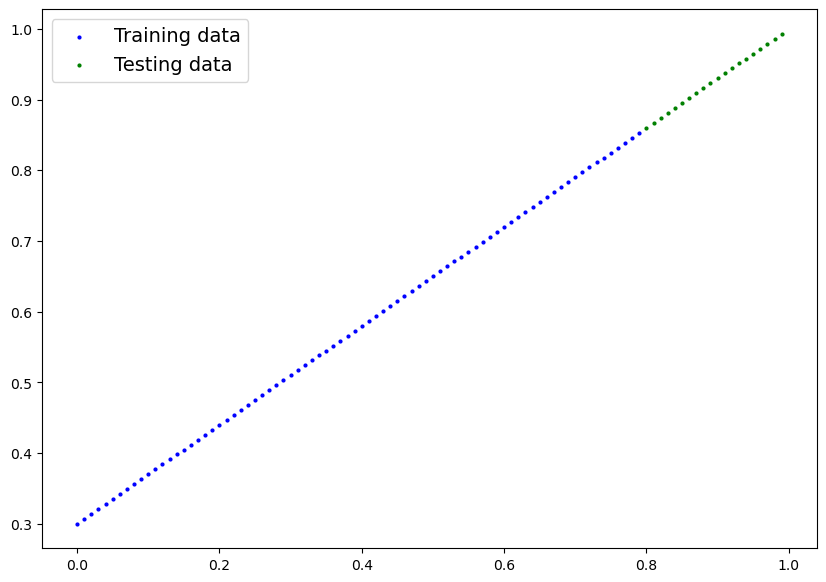

In [38]:
plot_predictions(train_data=X_train_regression,
                train_labels=y_train_regression,
                test_data=X_test_regression,
                test_labels=y_test_regression)

### 5.2 Adjusting 'model_1 to fit a straight line


In [39]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
        nn.Linear(in_features=1, out_features=10),
        nn.Linear(in_features=10, out_features=10),
        nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [40]:
L1_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                           lr=0.1)

In [41]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Setting Epochs
EPOCHS = 1000

# Put data on device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(EPOCHS):
    
    #train
    model_2.train()
    y_pred = model_2(X_train_regression)
    loss = L1_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_2.eval()
    with torch.inference_mode():
        y_test_pred = model_2(X_test_regression)
        
    test_loss = L1_fn(y_test_pred, y_test_regression)
    
    # Printing
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test Loss: 0.54143
Epoch: 100 | Loss: 0.09309 | Test Loss: 0.02901
Epoch: 200 | Loss: 0.07376 | Test Loss: 0.02850
Epoch: 300 | Loss: 0.06745 | Test Loss: 0.00615
Epoch: 400 | Loss: 0.06107 | Test Loss: 0.02004
Epoch: 500 | Loss: 0.05698 | Test Loss: 0.01061
Epoch: 600 | Loss: 0.04857 | Test Loss: 0.01326
Epoch: 700 | Loss: 0.06109 | Test Loss: 0.02127
Epoch: 800 | Loss: 0.05599 | Test Loss: 0.01426
Epoch: 900 | Loss: 0.05571 | Test Loss: 0.00603


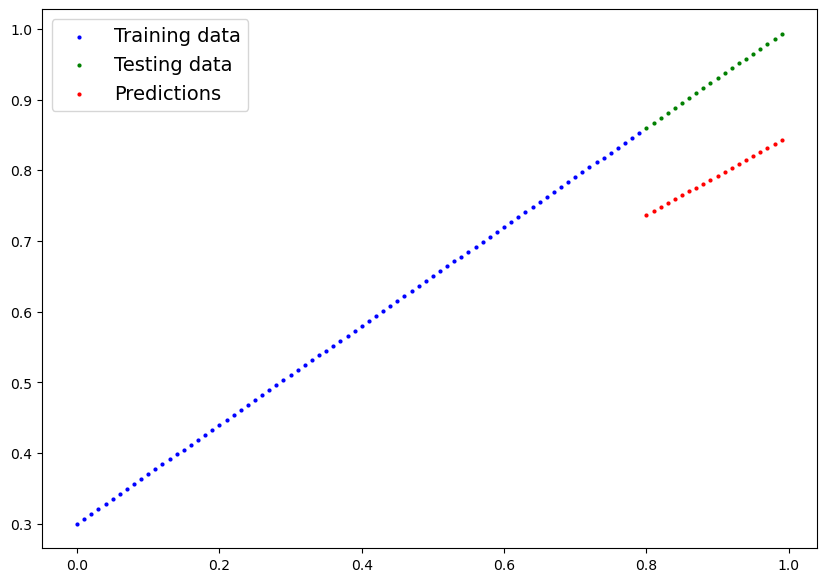

In [42]:
# Visualize

model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_test_regression)
    
plot_predictions(train_data=X_train_regression.cpu(),
                train_labels=y_train_regression.cpu(),
                test_data=X_test_regression.cpu(),
                test_labels=y_test_regression.cpu(),
                predictions=y_preds.cpu())

### 6. the missing piece of our model: non-linearity

"What patterns could you draw if you were gives an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

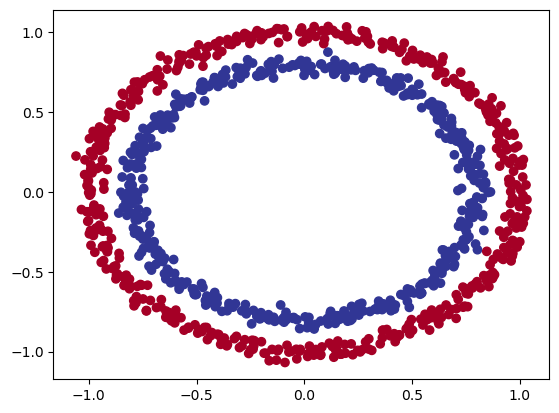

In [43]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=n_samples,
                   noise=0.03,
                   random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);


In [44]:
# Convert data to tensors and then to train and test
import torch
from sklearn.model_selection import train_test_split

# Turn data to tensors

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

### 6.2 Building a model on non-linearity
* Linear - Straght line
* Non-linear - non-straight line

Artifical neural networks are a large combination of linear (straight) and non-straight (non-linear) functionswhich are potentially able to find patterns in data

In [45]:
# Building a modle with non-linear activation functons

from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=10)
        self.layer_4 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # Where should we put our non- linear activation function
        return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))

model_3 = CircleModelV2().to(device)

model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=10, bias=True)
  (layer_4): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [46]:
# Setup Loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                           lr=0.1)

### 6.3 Training a model with non-linearity

In [47]:
# Random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

EPOCHS = 2000

for epoch in range (EPOCHS):
    
    model_3.train()
    y_train_logits = model_3(X_train).squeeze()
    y_train_pred = torch.round(torch.sigmoid(y_train_logits))
    train_loss = loss_fn(y_train_logits, y_train)
    train_acc = accuracy_fn(y_train, y_train_pred)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    model_3.eval()
    with torch.inference_mode():
        y_test_logits = model_3(X_test).squeeze()
        y_test_pred = torch.round(torch.sigmoid(y_test_logits))
    test_acc = accuracy_fn(y_test, y_test_pred)
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {train_loss:.5f}, Train acc: {train_acc:.3f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.3f}")

Epoch: 0 | Train loss: 0.69637, Train acc: 50.857 | Test loss: 0.13711, Test acc: 48.000
Epoch: 100 | Train loss: 0.69223, Train acc: 50.857 | Test loss: 0.13711, Test acc: 48.000
Epoch: 200 | Train loss: 0.69189, Train acc: 57.857 | Test loss: 0.13711, Test acc: 56.333
Epoch: 300 | Train loss: 0.69144, Train acc: 58.714 | Test loss: 0.13711, Test acc: 58.000
Epoch: 400 | Train loss: 0.69078, Train acc: 55.143 | Test loss: 0.13711, Test acc: 53.667
Epoch: 500 | Train loss: 0.68979, Train acc: 54.286 | Test loss: 0.13711, Test acc: 53.000
Epoch: 600 | Train loss: 0.68845, Train acc: 54.429 | Test loss: 0.13711, Test acc: 52.667
Epoch: 700 | Train loss: 0.68676, Train acc: 54.143 | Test loss: 0.13711, Test acc: 52.667
Epoch: 800 | Train loss: 0.68451, Train acc: 54.714 | Test loss: 0.13711, Test acc: 52.667
Epoch: 900 | Train loss: 0.68145, Train acc: 55.286 | Test loss: 0.13711, Test acc: 54.667
Epoch: 1000 | Train loss: 0.67710, Train acc: 56.571 | Test loss: 0.13711, Test acc: 56.667


### 6.4 Evaluate a model train with non-linear activation functions

In [48]:
# Make prediction 
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test).squeeze()))
    
y_preds[:5], y_test[:5] 

(tensor([1., 0., 1., 0., 1.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.], device='cuda:0'))

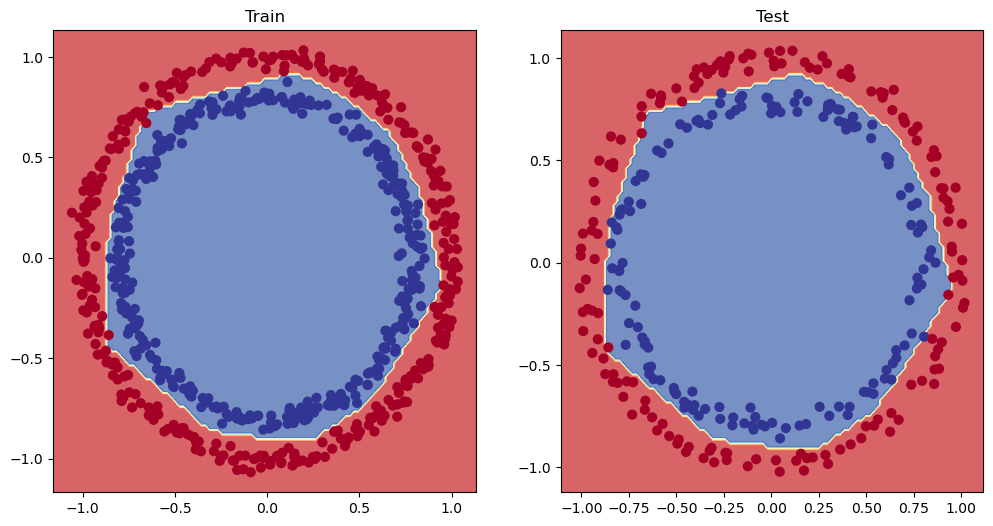

In [49]:
# Plot descision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation functions

Neural Network, rather than us telling the model what to learn , we give it the tools to discover patters in data and it tries to figure out the patterns on its own.

And these tools are linear and non-linear functions.

In [50]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

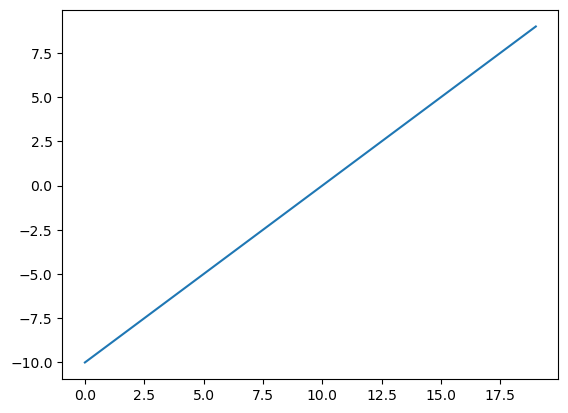

In [51]:
# visualize tensor
plt.plot(A);

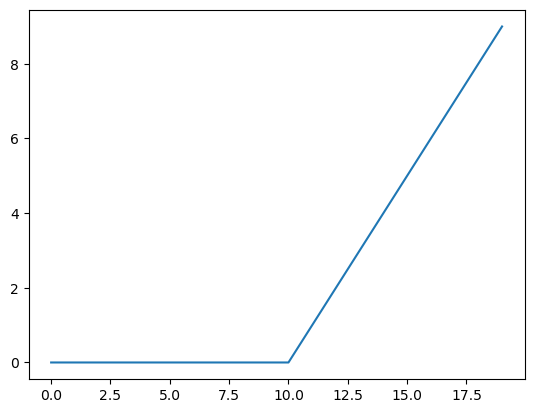

In [52]:
plt.plot(torch.relu(A));

In [53]:
def relu(x):
    return torch.maximum(torch.tensor(0), x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

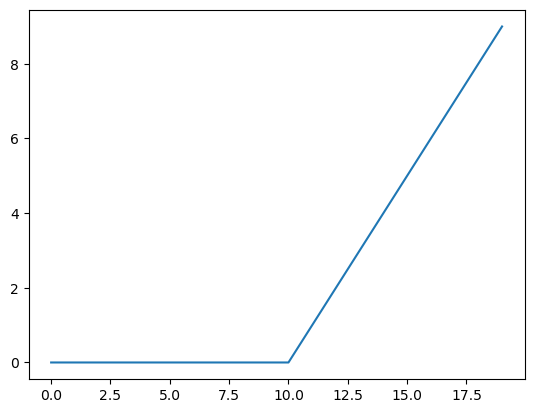

In [54]:
# plot Relu activation function
plt.plot(relu(A));

In [55]:
# now lets do same for sigmoid
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

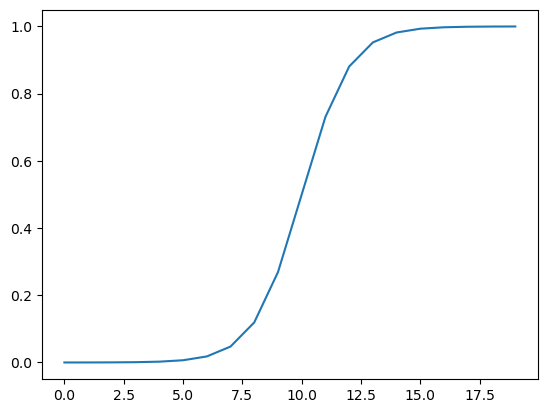

In [56]:
plt.plot(torch.sigmoid(A));

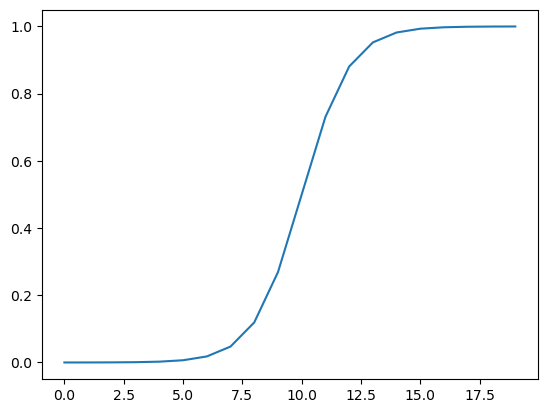

In [57]:
plt.plot(sigmoid(A));

## 8. Putting it all together with a multi-class classification 

* Binary classification : one vs another (cat vs. dog, sapm vs. not spam)
* Multi-class classiffication : one vs another (cat vs. dog vs. hen)

### 8.1 reating a toy mulit-class dataset

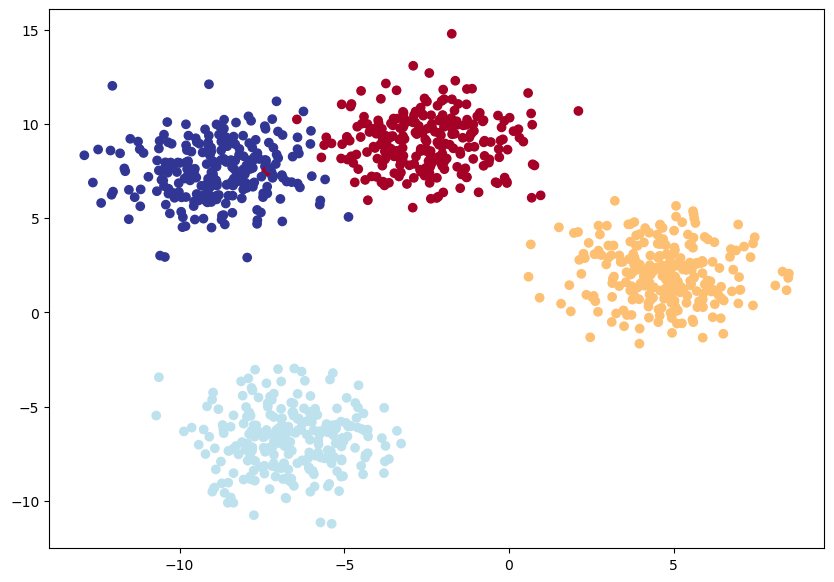

In [58]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Setup hyerparametrs for data creatioon
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                           n_features=NUM_FEATURES,
                           centers=NUM_CLASSES,
                           cluster_std=1.5,
                           random_state=RANDOM_SEED)

# 2. turm data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, 
                                                                        y_blob,
                                                                       test_size=0.2,
                                                                       random_state=42)

 # 4. Plot data 
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu);

### 8.2 Creating a multi-class classification model in pytorch


In [59]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [60]:
# Build  a multi--class classification model

class BlobModel(nn.Module):
    def __init__(self, input_features, out_features, hidden_units=8):
        """Initialize multi-class classification model.
        
        Args: 
            Input_features (int): Number of input features to the model
            output_features (int): Number of output features to the model
            hidden_units (int): Number of hidden units between layers, default = 8
        Returns:
        
        Example:
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=out_features)
        )
        
    def forward(self, x):
        return self.linear_layer_stack(x)
    
# Create an instance of blob model and send it to target device
model_4 = BlobModel(input_features=2,
                   out_features=4,
                   hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and a optimizer

In [61]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create a optimizer 
optimizer = torch.optim.SGD(params=model_4.parameters(),
                           lr=0.1) # learning rate is a hyperparameter that you can change


### 8.3 Getting predicting probabilites for a multi-class classification

In order to evaluate and train and test our model, we need to convert our models's outputs (logits) to prediction probabilities and then to prediction labels.

Logits -> Pred probs -> Pred labels 

In [62]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))

In [63]:
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [64]:
y_blob_test[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

In [65]:
y_logits.dim()

2

In [66]:
# Convert our model's logit output to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')
